In [1]:
import pandas as pd
data = pd.read_csv('predict_outcome.csv')

In [3]:
data.shape

(776503, 28)

In [4]:
data.isna().sum()

Unnamed: 0                   0
pitch_name                2082
release_speed             1768
events                       0
description                  0
p_throws                     0
type                         0
hit_distance_sc         586979
launch_speed            571142
launch_angle            571141
launch_speed_angle      637734
effective_speed           9627
pitch_number                 0
spin_rate_deprecated    776503
hit_location            600687
bb_type                 637726
release_spin_rate        29078
game_date                    0
pitch_number.1               0
vx0                       1835
vy0                       1835
vz0                       1835
ax                        1835
ay                        1835
az                        1835
pfx_x                     1835
pfx_z                     1835
bauer_units              29078
dtype: int64

In [2]:
#dropping unneeded columns
data.drop(columns=['Unnamed: 0', 'p_throws', 'type', 'pitch_number.1','game_date', 'bb_type', 'spin_rate_deprecated',\
                  'pitch_number','description' ],inplace = True)

In [6]:
#when hit distance, launch speed, and launch angle are null - should be zero
data

,pitch_name,release_speed,events,hit_distance_sc,launch_speed,launch_angle,launch_speed_angle,effective_speed,hit_location,release_spin_rate,vx0,vy0,vz0,ax,ay,az,pfx_x,pfx_z,bauer_units
0,Cutter,90.4,out,256.0,79.1,22.0,4.0,90.193,7.0,2449.0,-7.0650,-131.5120,-3.2980,-3.3340,27.8610,-30.5200,-0.394417,0.329000,27.090708
1,Slider,81.5,ball,NaN,NaN,NaN,NaN,81.301,NaN,2293.0,-7.9400,-118.3900,-2.9300,-0.9770,18.7140,-31.7650,-0.224633,0.232967,28.134969
2,Curveball,77.1,ball,NaN,NaN,NaN,NaN,75.063,NaN,2543.0,-6.2900,-112.1490,-2.4420,-4.2520,25.1530,-42.5170,-0.607342,-1.004000,32.983139
3,Cutter,87.6,strike,NaN,NaN,NaN,NaN,86.856,NaN,2513.0,-5.7420,-127.4870,-2.0310,0.4720,27.3210,-28.6500,-0.089642,0.502433,28.687215
4,Cutter,86.2,strike,NaN,NaN,NaN,NaN,86.030,NaN,2422.0,-6.8740,-125.3770,-2.6520,-1.3590,24.3800,-28.3090,-0.248292,0.539700,28.097448
5,4-Seam Fastball,91.8,ball,NaN,NaN,NaN,NaN,90.941,NaN,2115.0,-9.2520,-133.4200,-2.6920,10.4440,31.3750,-19.8110,0.684125,1.187567,23.039216
6,Cutter,88.1,single,60.0,89.1,3.0,2.0,87.526,9.0,2465.0,-5.2720,-128.2350,-2.3900,-1.4730,28.0230,-28.6660,-0.253858,0.498133,27.979569
7,Curveball,77.2,ball,NaN,NaN,NaN,NaN,75.389,NaN,2514.0,-4.6200,-112.3640,-0.7270,-5.7530,24.9120,-42.3200,-0.771558,-0.973900,32.564767
8,Slider,80.0,ball,NaN,NaN,NaN,NaN,78.974,NaN,NaN,-1.0720,-116.5000,-0.5600,-1.2300,22.3110,-35.8290,-0.255250,-0.189867,NaN
9,4-Seam Fastball,89.5,foul,233.0,75.0,35.0,NaN,88.828,NaN,2438.0,-7.9270,-130.1040,-3.6470,3.1830,27.4530,-22.1590,0.128850,1.031333,27.240223


In [3]:
#instead of Nan going to put a zero for hit location
import numpy as np 
data.hit_location = np.where(data.hit_location.isnull(), 0, data.hit_location)
data.launch_speed = np.where(data.launch_speed.isnull(), 0, data.launch_speed)
data.launch_speed_angle = np.where(data.launch_speed_angle.isnull(), 0, data.launch_speed_angle)
data.hit_distance_sc = np.where(data.hit_distance_sc.isnull(), 0 , data.hit_distance_sc)
data.launch_angle = np.where(data.launch_angle.isnull(), 0, data.launch_angle)


In [4]:
data.isna().sum()

pitch_name             2082
release_speed          1768
events                    0
hit_distance_sc           0
launch_speed              0
launch_angle              0
launch_speed_angle        0
effective_speed        9627
hit_location              0
release_spin_rate     29078
vx0                    1835
vy0                    1835
vz0                    1835
ax                     1835
ay                     1835
az                     1835
pfx_x                  1835
pfx_z                  1835
bauer_units           29078
dtype: int64

In [5]:
#dont want to skew data with putitng in mean values 
data.dropna(inplace = True)

In [6]:
data.isna().sum()

pitch_name            0
release_speed         0
events                0
hit_distance_sc       0
launch_speed          0
launch_angle          0
launch_speed_angle    0
effective_speed       0
hit_location          0
release_spin_rate     0
vx0                   0
vy0                   0
vz0                   0
ax                    0
ay                    0
az                    0
pfx_x                 0
pfx_z                 0
bauer_units           0
dtype: int64

In [9]:
#dependent variable is: events
data.shape

(746575, 19)

In [10]:
#going to one hot encode pitch_name
data = pd.concat([data,pd.get_dummies(data['pitch_name'], prefix='pitch')],axis=1)

In [7]:
#going to do label encoding for pitch names, see if there is a difference
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
data['pitch_name']= le.fit_transform(data['pitch_name'])

In [7]:
data.head(10)

,pitch_name,release_speed,events,hit_distance_sc,launch_speed,launch_angle,launch_speed_angle,effective_speed,hit_location,release_spin_rate,vx0,vy0,vz0,ax,ay,az,pfx_x,pfx_z,bauer_units
0,4,90.4,out,256.0,79.1,22.0,4.0,90.193,7.0,2449.0,-7.065,-131.512,-3.298,-3.334,27.861,-30.520,-0.394417,0.329000,27.090708
1,7,81.5,ball,0.0,0.0,0.0,0.0,81.301,0.0,2293.0,-7.940,-118.390,-2.930,-0.977,18.714,-31.765,-0.224633,0.232967,28.134969
2,3,77.1,ball,0.0,0.0,0.0,0.0,75.063,0.0,2543.0,-6.290,-112.149,-2.442,-4.252,25.153,-42.517,-0.607342,-1.004000,32.983139
3,4,87.6,strike,0.0,0.0,0.0,0.0,86.856,0.0,2513.0,-5.742,-127.487,-2.031,0.472,27.321,-28.650,-0.089642,0.502433,28.687215
4,4,86.2,strike,0.0,0.0,0.0,0.0,86.030,0.0,2422.0,-6.874,-125.377,-2.652,-1.359,24.380,-28.309,-0.248292,0.539700,28.097448
5,1,91.8,ball,0.0,0.0,0.0,0.0,90.941,0.0,2115.0,-9.252,-133.420,-2.692,10.444,31.375,-19.811,0.684125,1.187567,23.039216
6,4,88.1,single,60.0,89.1,3.0,2.0,87.526,9.0,2465.0,-5.272,-128.235,-2.390,-1.473,28.023,-28.666,-0.253858,0.498133,27.979569
7,3,77.2,ball,0.0,0.0,0.0,0.0,75.389,0.0,2514.0,-4.620,-112.364,-0.727,-5.753,24.912,-42.320,-0.771558,-0.973900,32.564767
9,1,89.5,foul,233.0,75.0,35.0,0.0,88.828,0.0,2438.0,-7.927,-130.104,-3.647,3.183,27.453,-22.159,0.128850,1.031333,27.240223
10,0,85.6,out,300.0,91.6,37.0,3.0,85.222,9.0,1360.0,-6.415,-124.506,-0.322,11.561,26.242,-24.781,0.899833,0.872233,15.887850


In [12]:
#data.drop(columns=['pitch_name'], inplace = True)

# Going to start testing model

Setting up SVM dataset 

In [13]:
svm_data = data.loc[::5]

In [14]:
#150,000 rows
svm_data.shape

(149315, 19)

In [15]:
X_svm = svm_data.drop(columns=['events', 'hit_location', 'launch_speed_angle'], axis =1)
y_svm = svm_data.events

In [18]:
#scaling data
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
svm_scale = scaler.fit_transform(X_svm)
#train and test data
from sklearn.model_selection import train_test_split
X_svm_train, X_svm_test, y_train, y_test = train_test_split(svm_scale, y_svm, random_state=1)

/Users/nickrad/anaconda3/envs/PythonData/lib/python3.6/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


In [19]:
#Got it to run with 150,000 rows
from sklearn import svm
clf = svm.SVC(gamma='scale', decision_function_shape='ovr', class_weight= None)
clf.fit(X_svm_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [ ]:
clf.score(X_svm_train, y_train)

In [ ]:
clf.score(X_svm_test, y_test)

In [ ]:
clf_svm_predict = clf.predict(X_svm_test)
from sklearn.metrics import classification_report
print(classification_report(clf_svm_predict, y_test))

In [7]:
test_data = data.loc[:730000:40]

Running full model


In [7]:
X = data.drop(columns=['events', 'hit_location', 'launch_speed_angle'], axis =1)
y = data.events

In [8]:
#setting up X and y , dropping hit location too
X = test_data.drop(columns=['events', 'hit_location', 'launch_speed_angle'], axis =1)
y = test_data.events

In [8]:
#scaling data
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_scale = scaler.fit_transform(X)
#train and test data
from sklearn.model_selection import train_test_split
X_scale_train, X_scale_test, y_train, y_test = train_test_split(X_scale, y, random_state=1)

/Users/nickrad/anaconda3/envs/PythonData/lib/python3.6/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


In [15]:
#14,000 rows to test
test_data.shape

(14023, 27)

In [10]:
#train and test data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [11]:
#performing a logistic regression to see the baseline
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(multi_class= 'multinomial', solver='newton-cg', C=1e5)
classifier

LogisticRegression(C=100000.0, class_weight=None, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='multinomial', n_jobs=None, penalty='l2',
          random_state=None, solver='newton-cg', tol=0.0001, verbose=0,
          warm_start=False)

In [12]:
classifier.fit(X_train,y_train)

/Users/nickrad/anaconda3/envs/PythonData/lib/python3.6/site-packages/sklearn/utils/optimize.py:203: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)


LogisticRegression(C=100000.0, class_weight=None, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='multinomial', n_jobs=None, penalty='l2',
          random_state=None, solver='newton-cg', tol=0.0001, verbose=0,
          warm_start=False)

In [13]:
print(f"Training Data Score: {classifier.score(X_train, y_train)}")
print(f"Testing Data Score: {classifier.score(X_test, y_test)}")

Training Data Score: 0.504388933636466
Testing Data Score: 0.5032950429695034


In [14]:
predictions = classifier.predict(X_test)
results = pd.DataFrame({"Prediction": predictions, "Actual": y_test}).reset_index(drop=True)

In [15]:
results['Prediction'].value_counts()

ball        115682
out          31345
strike       21126
foul         16272
home_run      1846
double         371
single           2
Name: Prediction, dtype: int64

In [16]:
from sklearn.metrics import classification_report
print(classification_report(predictions, y_test))

/Users/nickrad/anaconda3/envs/PythonData/lib/python3.6/site-packages/sklearn/metrics/classification.py:1145: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


              precision    recall  f1-score   support

        ball       0.85      0.50      0.63    115682
      double       0.08      0.44      0.13       371
 field_error       0.00      0.00      0.00         0
        foul       0.30      0.62      0.40     16272
hit_by_pitch       0.00      0.00      0.00         0
    home_run       0.78      0.59      0.67      1846
         out       0.77      0.54      0.64     31345
      single       0.00      0.00      0.00         2
      strike       0.16      0.39      0.23     21126
      triple       0.00      0.00      0.00         0

   micro avg       0.50      0.50      0.50    186644
   macro avg       0.29      0.31      0.27    186644
weighted avg       0.71      0.50      0.56    186644



In [16]:
#importing SGD cal
from sklearn.linear_model import SGDClassifier
SGD = SGDClassifier(n_iter= 10)
SGD.fit(X_train,y_train)
SGD.score(X_test, y_test)

/Users/nickrad/anaconda3/envs/PythonData/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:152: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)


0.3580556823368325

In [17]:
SGDpredict = SGD.predict(X_test)
from sklearn.metrics import classification_report
print(classification_report(SGDpredict, y_test))

              precision    recall  f1-score   support

        ball       0.00      0.00      0.00         0
      double       0.00      0.00      0.00         0
 field_error       0.00      0.00      0.00         0
        foul       0.39      0.38      0.38       806
hit_by_pitch       0.08      0.02      0.03        62
    home_run       0.07      0.50      0.12         4
         out       0.00      1.00      0.01         2
      single       0.32      0.21      0.25       273
      strike       1.00      0.37      0.54      3235
      triple       0.00      0.00      0.00         0

   micro avg       0.36      0.36      0.36      4382
   macro avg       0.19      0.25      0.13      4382
weighted avg       0.83      0.36      0.49      4382



/Users/nickrad/anaconda3/envs/PythonData/lib/python3.6/site-packages/sklearn/metrics/classification.py:1145: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


In [17]:
#trying gradient boosting
#definitely the best so far
from sklearn.ensemble import GradientBoostingClassifier
model = GradientBoostingClassifier()
model.fit(X_train, y_train)
print(f"R-squared = {model.score(X_train,y_train)}")

R-squared = 0.6220498597148577


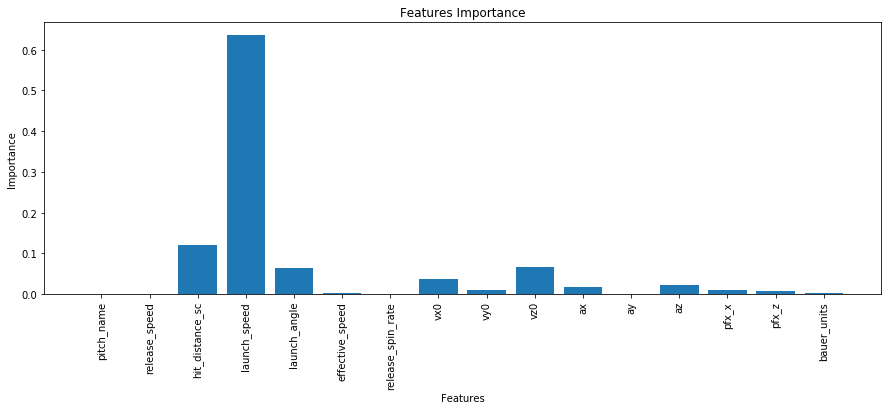

In [19]:
#might drop hit location
import matplotlib.pyplot as plt
plt.figure(1, figsize=(15, 5))
plt.bar(range(len(model.feature_importances_)), model.feature_importances_)
labels = list(X_train)
plt.xticks(range(len(model.feature_importances_)), labels, rotation='vertical')
plt.xlabel("Features")
plt.ylabel("Importance")
plt.title("Features Importance")
plt.show()

In [26]:
modelpredict = model.predict(X_test)
from sklearn.metrics import classification_report
print(classification_report(y_test, modelpredict))

              precision    recall  f1-score   support

        ball       0.63      0.71      0.67      1606
      double       0.33      0.17      0.22        54
 field_error       0.00      0.00      0.00        12
        foul       0.69      0.29      0.41       782
hit_by_pitch       0.00      0.00      0.00        12
    home_run       0.67      0.64      0.65        28
         out       0.64      0.75      0.69       503
      single       0.50      0.52      0.51       176
      strike       0.49      0.58      0.53      1206
      triple       0.00      0.00      0.00         3

   micro avg       0.59      0.59      0.59      4382
   macro avg       0.40      0.37      0.37      4382
weighted avg       0.59      0.59      0.57      4382



In [ ]:
#going to try support vectors
#scores were lower with a balanced class weight
#this model is supposed to perform much better when scaling data
from sklearn import svm
clf = svm.SVC(gamma='scale', decision_function_shape='ovr', class_weight= None)
clf.fit(X_scale_train, y_train)

In [22]:
clf.score(X_scale_train, y_train)

0.530655712764339

In [23]:
clf.score(X__scale_test, y_test)

0.5298950251026928

In [24]:
clf_predict = clf.predict(X_test)
from sklearn.metrics import classification_report
print(classification_report(clf_predict, y_test))

              precision    recall  f1-score   support

        ball       0.99      0.50      0.66      3212
      double       0.00      0.00      0.00         0
 field_error       0.00      0.00      0.00         0
        foul       0.28      0.70      0.40       311
hit_by_pitch       0.00      0.00      0.00         0
    home_run       0.68      0.63      0.66        30
         out       0.82      0.60      0.69       691
      single       0.39      0.60      0.47       115
      strike       0.01      0.39      0.01        23
      triple       0.00      0.00      0.00         0

   micro avg       0.53      0.53      0.53      4382
   macro avg       0.32      0.34      0.29      4382
weighted avg       0.89      0.53      0.64      4382



/Users/nickrad/anaconda3/envs/PythonData/lib/python3.6/site-packages/sklearn/metrics/classification.py:1145: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


In [ ]:
#SVM with scaled data
from sklearn import svm
clf = svm.SVC(gamma='scale', decision_function_shape='ovr', class_weight='balanced', cache_size= 500)
clf.fit(X_scale_train, y_train)


In [18]:
clf.score(X_scale_train, y_train)

0.5699343919368641

In [19]:
clf_predict = clf.predict(X_scale_test)
from sklearn.metrics import classification_report
print(classification_report( y_test, clf_predict))

              precision    recall  f1-score   support

        ball       0.49      1.00      0.66      1253
      double       0.00      0.00      0.00        36
 field_error       0.00      0.00      0.00         5
        foul       0.97      0.48      0.65       628
hit_by_pitch       0.00      0.00      0.00         6
    home_run       0.83      0.44      0.58        34
         out       0.66      0.99      0.79       414
      single       0.00      0.00      0.00       150
      strike       0.00      0.00      0.00       972
      triple       0.00      0.00      0.00         8

   micro avg       0.56      0.56      0.56      3506
   macro avg       0.30      0.29      0.27      3506
weighted avg       0.43      0.56      0.45      3506



/Users/nickrad/anaconda3/envs/PythonData/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [1]:
#For thursday - finish github slides
#identify 'best' model
#lots 

In [20]:
#logistic regression with scaled data
#performing a logistic regression to see the baseline
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(multi_class= 'multinomial', solver='newton-cg', C=1e5)
classifier

LogisticRegression(C=100000.0, class_weight=None, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='multinomial', n_jobs=None, penalty='l2',
          random_state=None, solver='newton-cg', tol=0.0001, verbose=0,
          warm_start=False)

In [21]:
classifier.fit(X_scale_train,y_train)

/Users/nickrad/anaconda3/envs/PythonData/lib/python3.6/site-packages/sklearn/utils/optimize.py:203: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)


LogisticRegression(C=100000.0, class_weight=None, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='multinomial', n_jobs=None, penalty='l2',
          random_state=None, solver='newton-cg', tol=0.0001, verbose=0,
          warm_start=False)

In [22]:
print(f"Training Data Score: {classifier.score(X_scale_train, y_train)}")
print(f"Testing Data Score: {classifier.score(X_scale_test, y_test)}")

Training Data Score: 0.5698393077873919
Testing Data Score: 0.5681688533941814


Going to use a linear SVM to get a model to run

In [11]:
#have to encode y
y_train = le.fit_transform(y_train)

In [16]:
from sklearn.svm import LinearSVR
regr = LinearSVC()
regr.fit(X_scale_train, y_train)

NameError: name 'LinearSVC' is not defined

In [13]:
regr.score(X_scale_train,y_train)

-0.06549543018714776

In [15]:
y_test = le.fit_transform(y_test)
regr_predict = regr.predict(X_scale_test)
from sklearn.metrics import classification_report
print(classification_report(regr_predict, y_test))

ValueError: Classification metrics can't handle a mix of continuous and multiclass targets